# First experiment

results/Result_depth_0_alpha_0.01_beta_0.4.npy
0.06898193246993545
results/Result_depth_1_alpha_0.01_beta_0.4.npy
0.06902216369887919
results/Result_depth_2_alpha_0.005_beta_0.4.npy
0.07047628586518191
results/Result_depth_3_alpha_0.0002_beta_0.7.npy
0.07838919122638033
results/Result_depth_4_alpha_0.002_beta_0.4.npy
0.07747439645467376
results/Result_depth_5_alpha_0.0005_beta_0.npy
0.08410258229693887
results/Result_depth_6_alpha_0_beta_0.99.npy
0.09928257352863915


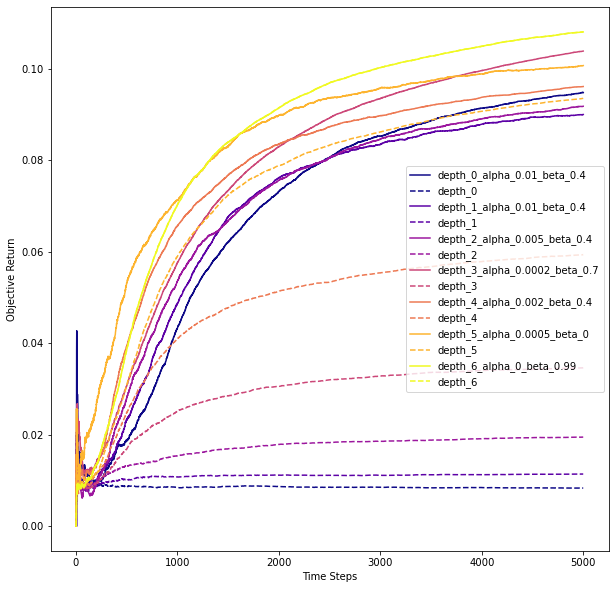

In [7]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for depth in range(7):
    max_res = 0
    max_file = None
    for file in glob.glob("results/Result_depth_{}*".format(depth)):
        data = np.load(file)
        res = np.mean(data)
        if res > max_res:
            max_res = res
            max_file = file
    print(max_file)
    print(max_res)
    data = np.load(max_file)
    data1 = np.zeros(5000)
    #if alpha is zero, value of beta doesn't matter
    lst = glob.glob("results/Result_depth_{}_alpha_0_*".format(depth))
    for file in lst:
        data1 += np.load(file)
    data1 /= len(lst)
    if depth == 6:
        data = data1
    plt.xlabel("Time Steps")
    plt.ylabel("Objective Return")
    plt.plot(data, 
             label=max_file[15:-4],
             color=plt.cm.plasma(depth/6),
            )
    plt.plot(data1, 
             linestyle="dashed", 
             label="depth_{}".format(depth),
             color=plt.cm.plasma(depth/6),
            )
plt.legend()
plt.show()